In [74]:
import pandas as pd
import numpy as np 
import datetime as dt
import matplotlib as mpl
import matplotlib.pyplot as plt

In [75]:
#Set name as df

In [76]:
df = pd.read_excel("C:/Users/LENOVO/Desktop/Geodatasci/Fire_Data.xlsx")

In [77]:
df

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.4,5.8,0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.3,6.4,0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,305.0,3.8,0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,306.0,4.6,0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,635,N,VIIRS,n,1,303.9,3.1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,2003,N,VIIRS,n,1,294.4,7.2,0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.9,0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,293.7,2.2,0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,2003,N,VIIRS,n,1,292.7,2.9,0


In [78]:
#Check the data type of all columns

In [79]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME               int64
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [80]:
#Time in hh:mm

In [81]:
df['ACQ_TIME'] = (df['ACQ_TIME']/100).astype(str)
df['ACQ_TIME'] = df['ACQ_TIME'].str.replace('.',':',regex=True)

In [82]:
#Check the data type of all columns

In [83]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
dtype: object

In [84]:
#Display ACQ_TIME columns

In [85]:
df['ACQ_TIME']

0         6:35
1         6:35
2         6:35
3         6:35
4         6:35
         ...  
79229    20:03
79230    20:03
79231    20:03
79232    20:03
79233    20:03
Name: ACQ_TIME, Length: 79234, dtype: object

In [86]:
#Datetime

In [87]:
df['datetime'] = pd.to_datetime(df['ACQ_DATE'].astype(str)+' '+df['ACQ_TIME'])

In [88]:
#Check the data type of all columns

In [89]:
df.dtypes

OBJECTID               int64
LATITUDE             float64
LONGITUDE            float64
BRIGHT_TI4           float64
SCAN                 float64
TRACK                float64
ACQ_DATE      datetime64[ns]
ACQ_TIME              object
SATELLITE             object
INSTRUMENT            object
CONFIDENCE            object
VERSION                int64
BRIGHT_TI5           float64
FRP                  float64
TYPE                   int64
datetime      datetime64[ns]
dtype: object

In [90]:
#20 days

In [91]:
df2=df[df['datetime'] <= (df['datetime'].iloc[0] + pd.Timedelta(days=20))]

In [92]:
df2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,datetime
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1674,16.72842,99.06961,304.5,0.56,0.69,2019-12-20,18:1,N,VIIRS,n,1,289.4,1.2,0,2019-12-20 18:01:00
1674,1675,16.90826,98.54372,300.1,0.61,0.71,2019-12-20,18:1,N,VIIRS,n,1,289.6,1.3,0,2019-12-20 18:01:00
1675,1676,16.59843,98.63080,309.0,0.59,0.70,2019-12-20,19:51,N,VIIRS,n,1,288.8,2.6,0,2019-12-20 19:51:00
1676,1677,16.77489,98.62441,299.1,0.59,0.70,2019-12-20,19:51,N,VIIRS,n,1,288.4,0.3,0,2019-12-20 19:51:00


In [93]:
#Plot graph-Find time diff

In [94]:
df['delta']=df['datetime']-df['datetime'].iloc[0]
df['delmin']=(df['delta'].dt.total_seconds())/60

In [95]:
df

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,datetime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79229,79230,17.81812,97.74127,347.4,0.78,0.78,2020-04-04,20:03,N,VIIRS,n,1,294.4,7.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79230,79231,17.77545,97.85637,306.5,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79231,79232,17.76847,97.79116,305.7,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,293.7,2.2,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0
79232,79233,17.77518,97.82606,306.1,0.79,0.78,2020-04-04,20:03,N,VIIRS,n,1,292.7,2.9,0,2020-04-04 20:03:00,125 days 13:28:00,180808.0


In [96]:
df2 = df[df['datetime'] <= (df['datetime'].iloc[0] + pd.Timedelta(days=20))]

In [97]:
df2

,OBJECTID,LATITUDE,LONGITUDE,BRIGHT_TI4,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_TI5,FRP,TYPE,datetime,delta,delmin
0,1,16.33696,98.70137,334.5,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.4,5.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
1,2,16.48906,98.73961,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.3,6.4,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
2,3,16.93571,99.06874,339.4,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,305.0,3.8,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
3,4,16.54092,98.59869,343.2,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,306.0,4.6,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
4,5,16.87473,98.63222,331.1,0.39,0.36,2019-12-01,6:35,N,VIIRS,n,1,303.9,3.1,0,2019-12-01 06:35:00,0 days 00:00:00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673,1674,16.72842,99.06961,304.5,0.56,0.69,2019-12-20,18:1,N,VIIRS,n,1,289.4,1.2,0,2019-12-20 18:01:00,19 days 11:26:00,28046.0
1674,1675,16.90826,98.54372,300.1,0.61,0.71,2019-12-20,18:1,N,VIIRS,n,1,289.6,1.3,0,2019-12-20 18:01:00,19 days 11:26:00,28046.0
1675,1676,16.59843,98.63080,309.0,0.59,0.70,2019-12-20,19:51,N,VIIRS,n,1,288.8,2.6,0,2019-12-20 19:51:00,19 days 13:16:00,28156.0
1676,1677,16.77489,98.62441,299.1,0.59,0.70,2019-12-20,19:51,N,VIIRS,n,1,288.4,0.3,0,2019-12-20 19:51:00,19 days 13:16:00,28156.0


In [98]:
#show column LATITUDE,LONGITUDE,delmin

In [99]:
df2 =df[["LATITUDE","LONGITUDE","delmin"]].head(1678)
df2

,LATITUDE,LONGITUDE,delmin
0,16.33696,98.70137,0.0
1,16.48906,98.73961,0.0
2,16.93571,99.06874,0.0
3,16.54092,98.59869,0.0
4,16.87473,98.63222,0.0
...,...,...,...
1673,16.72842,99.06961,28046.0
1674,16.90826,98.54372,28046.0
1675,16.59843,98.63080,28156.0
1676,16.77489,98.62441,28156.0


In [100]:
#Ploting Graph showing LATITUDE,LONGITUDE,delmin

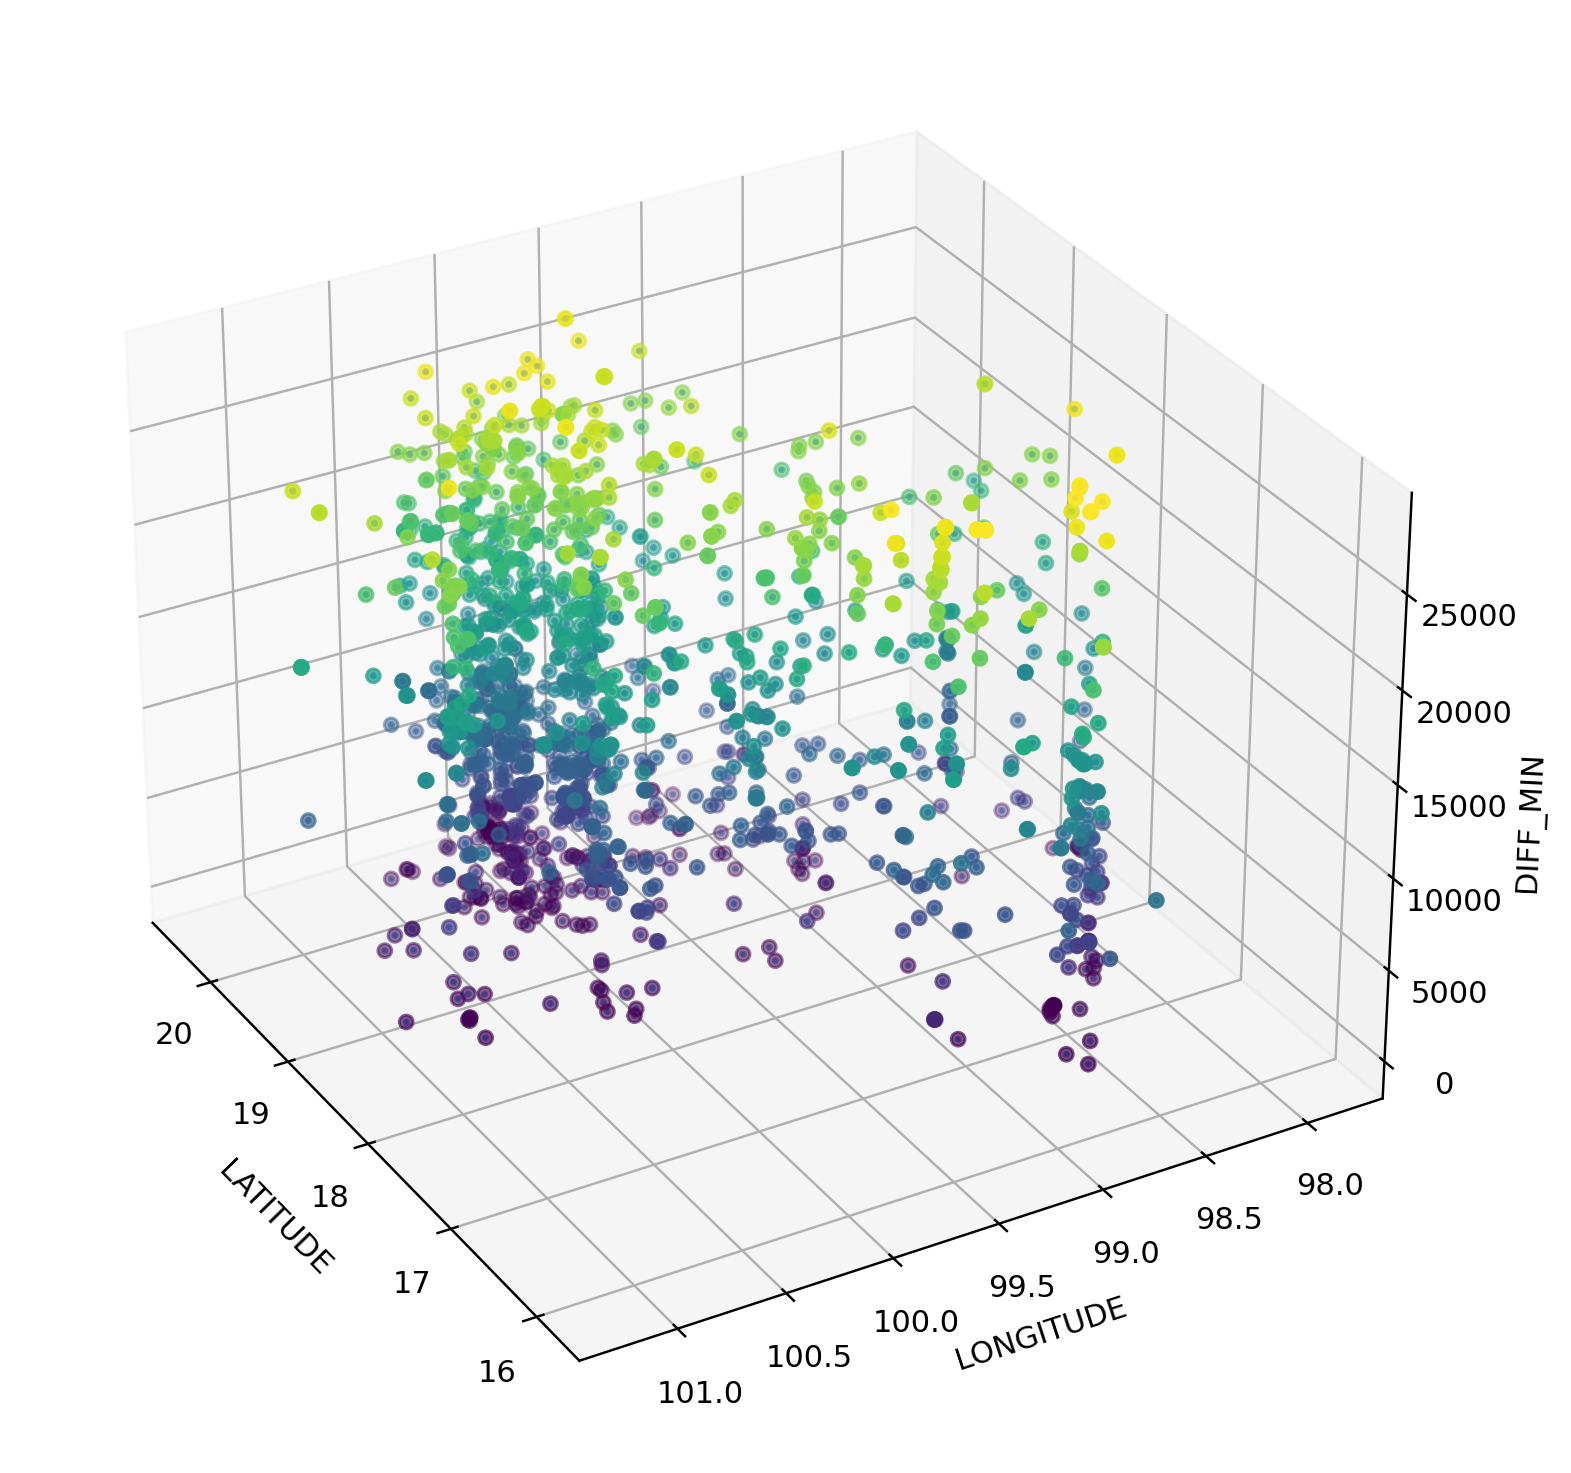

In [104]:
plt.rcParams['figure.figsize']=(10,6.5)
plt.rcParams['figure.dpi']=220

from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()

ax = Axes3D(fig)
x=df2['LATITUDE']
y=df2['LONGITUDE']
z=df2['delmin']
ax.scatter(x,y,z,s=2)
ax.view_init(azim=150)
ax.set_xlabel('LATITUDE')
ax.set_ylabel('LONGITUDE')
ax.set_zlabel('DIFF_MIN')
pnt3d=ax.scatter(x,y,z,c=z)

plt.show()

In [105]:
#ทำการ Clustering แบบ K-Means

In [107]:
from sklearn.cluster import KMeans

In [108]:
n_clusters=7 #Grouping into 7 groups

In [110]:
kmeans = KMeans(n_clusters=n_clusters)
kmeans.fit(df2)

KMeans(n_clusters=7)

In [111]:
cluster_labels = kmeans.labels_
SS = kmeans.inertia_ #Sum of squared distances of samples to their closest cluster center.

In [124]:
SS

1773551069.3172383

In [129]:
df2_ar = np.array(df2.values.tolist())

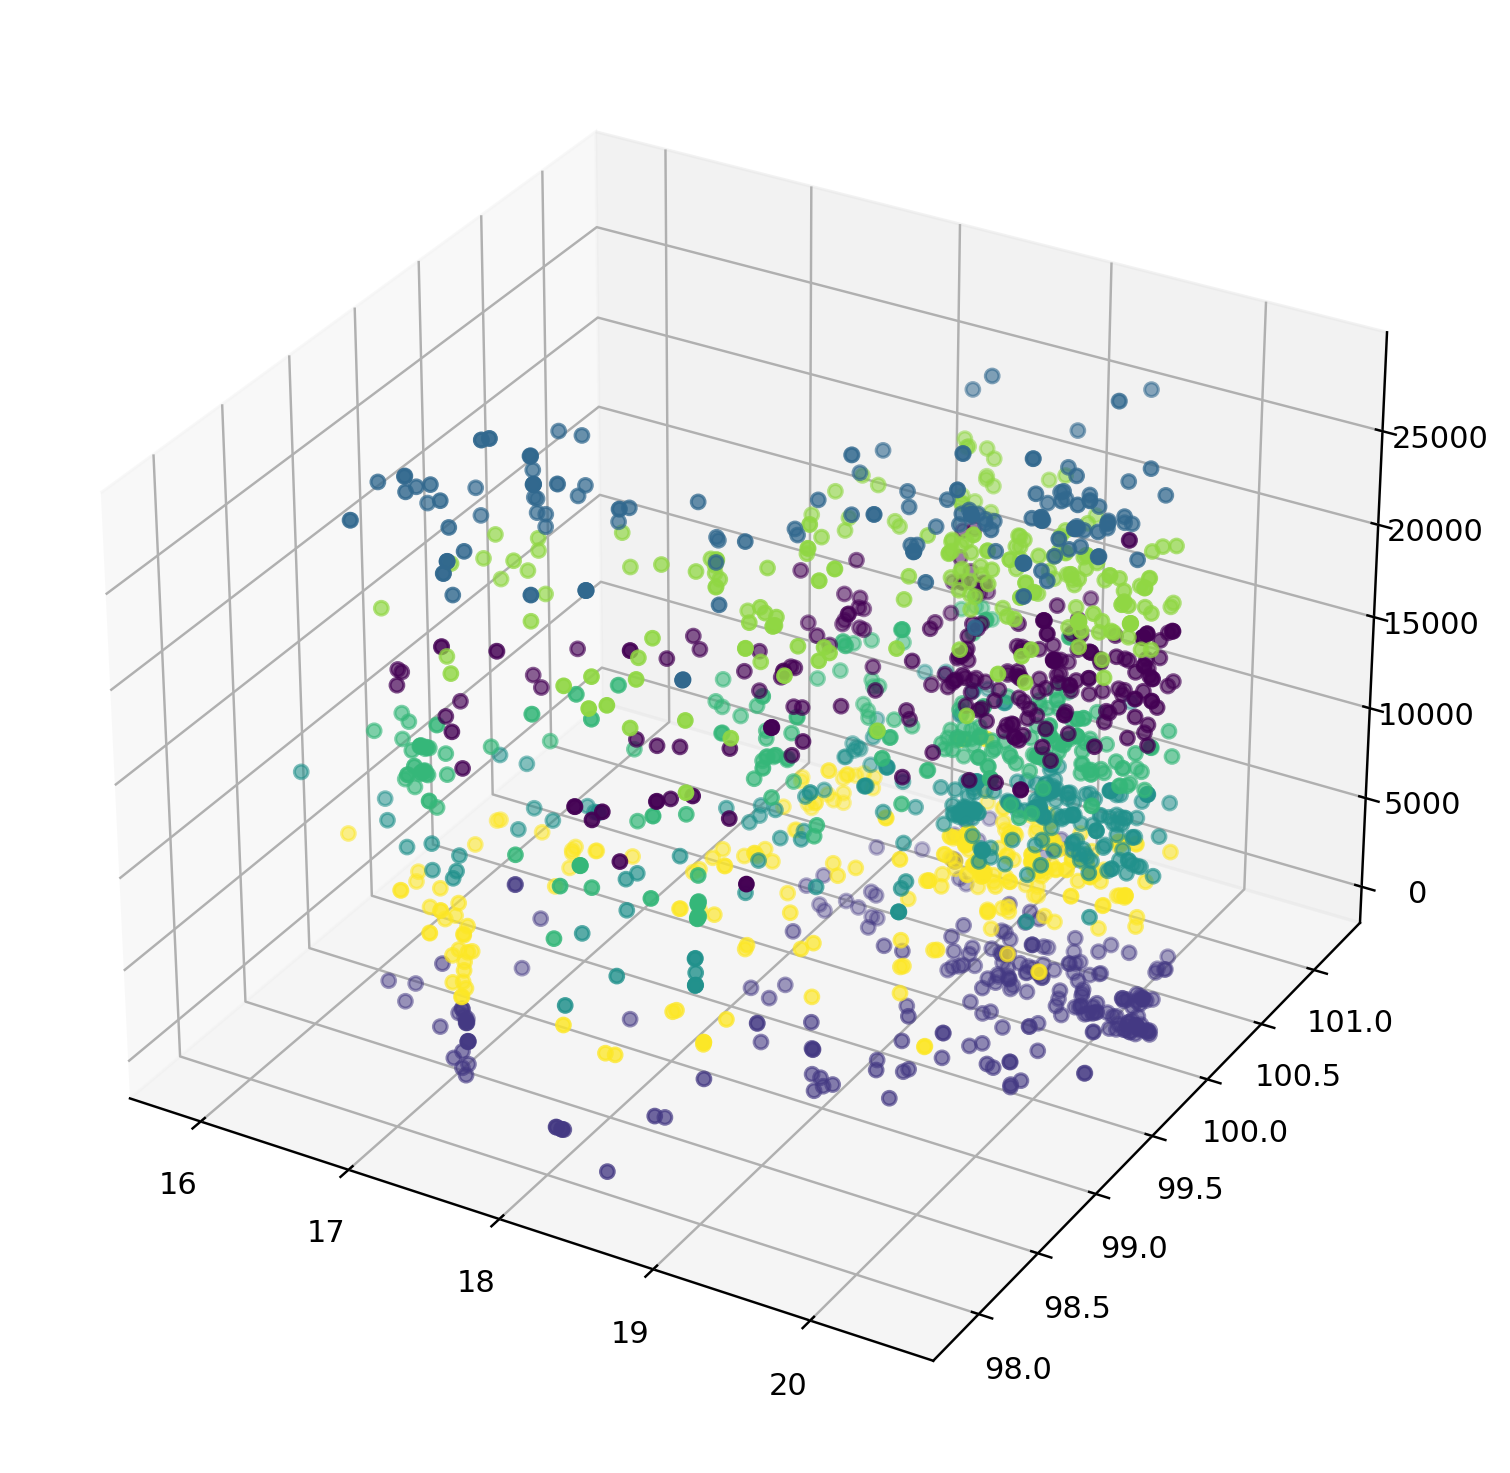

In [131]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(df2_ar[:,0], df2_ar[:,1], df2_ar[:,2], c=cluster_labels, cmap='viridis')



In [133]:
from sklearn.metrics import silhouette_samples, silhouette_score
silhouette_avg = silhouette_score(df2, cluster_labels)

In [135]:
sample_silhouette_values = silhouette_samples(df2, cluster_labels)

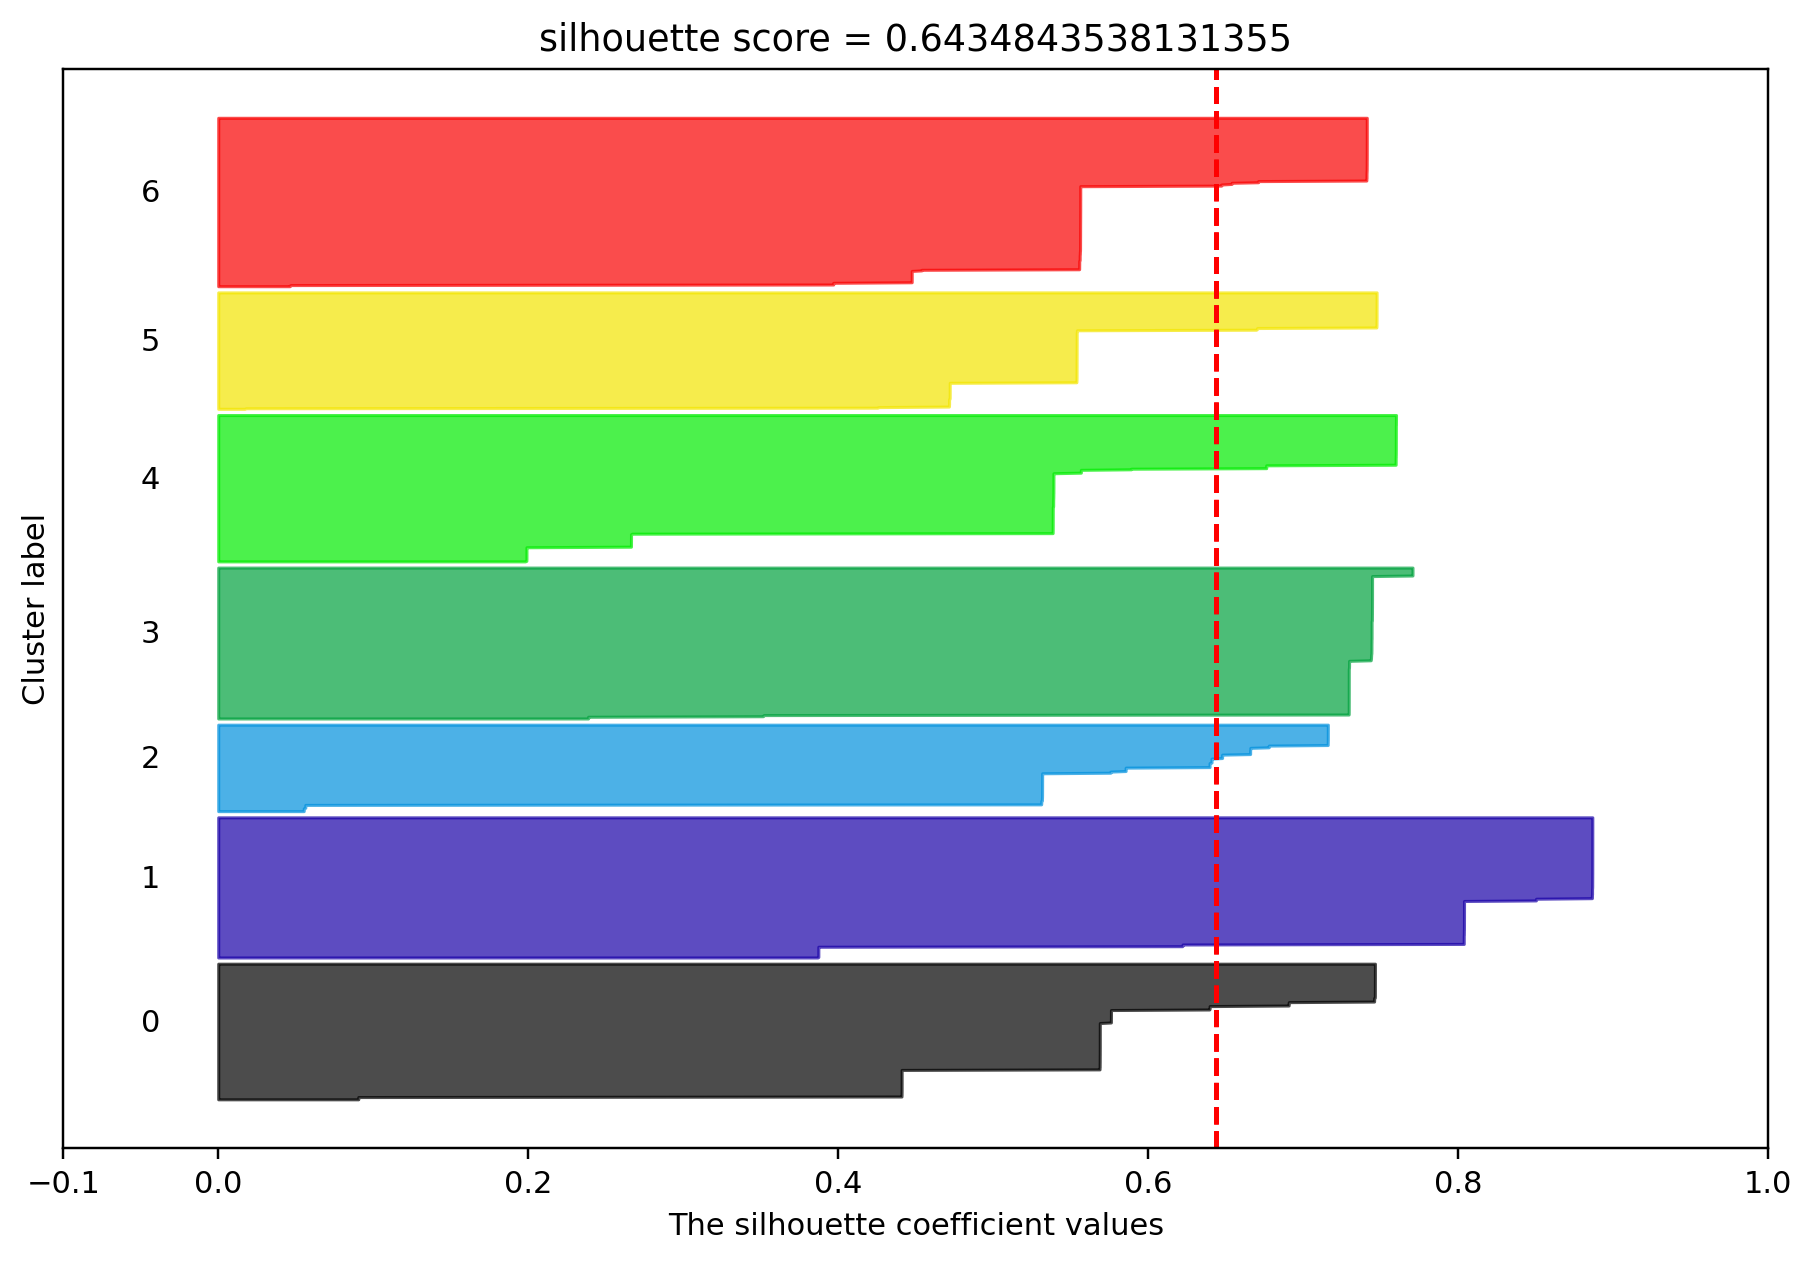

In [138]:
import matplotlib.cm as cm
fig, ax = plt.subplots()
y_lower = 10
for i in range(n_clusters):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_clusters)
    plt.fill_betweenx(np.arange(y_lower, y_upper),
          0, ith_cluster_silhouette_values,
          facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    plt.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

    ax.set_title("silhouette score = " + str(silhouette_avg))
    ax.set_xlabel("The silhouette coefficient values")
    ax.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    plt.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax.set_yticks([])  # Clear the yaxis labels / ticks
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

ใช้เทคนิค K-Means Clustering ซึ่งเป็นการแบ่งกลุ่มโดยใช้จุดกลาง (centroid-based clustering) โดยการจับกลุ่มข้อมูลจะอาศัยระยะทางจากจุด centroid ของกลุ่ม ซึ่งจุด centroid นั้นอาจไม่ใช้ตำแหน่งที่ข้อมูลอยู่ก็ได้ โดยกำหนดค่าดังนี้ กำหนดจำนวนกลุ่ม(K) = 7 เนื่องจากต้องกำหนดจำนวนกลุ่มเอง ในบางครั้งเราสามารถใช้ค่า Silhouette Score เพื่อกำหนดจำนวนกลุ่มที่เหมาะสมได้ซึ่งในที่นี้ได้ Silhoulette score = 0.6434843538131355 ซึ่งค่า silhouette score จะอยู่ในหว่าง 1 และ -1 หากเข้าใกล้ 1 แสดงว่าจุดนั้นถูก จัดอยู่ในกลุ่มได้เหมาะสม หรือ มีระยะใกล้กับสมาชิกที่อยู่กลุ่มเดียวกันและมีระยะห่างจากกลุ่มอื่น ๆ จากภาพด้านบนแสดง silhouette coefficient ของข้อมูลทุกข้อมูล โดยแบ่งสีตามกลุ่ม และ ความหนาของแถบสีแสดงถึงจำนวนสมาชิกในกลุ่ม ความยาวของแถบสีคือค่า silhouette score ของแต่ละตัวอย่างเรียงจากมากที่สุดไปน้อยที่สุด และ เส้นประสีแดงแสดง silhouette score เฉลี่ยจากทุกข้อมูลซึ่งถ้ายิ่งมีค่ามากยิ่งดี